<a href="https://colab.research.google.com/github/Irshadbasha07/Codes/blob/main/IMDB_EDA_(1)_(1)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


# **Loading Dataset**

In [ ]:

df = pd.read_csv('/content/IMDB-Movie-Data.csv')



In [ ]:

print(df.shape)


df.info()


(1000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  1000 non-null   float64
 11  Metascore           1000 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB


In [ ]:

df.describe()


,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,72.337960,58.843000
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,100.320314,17.074891
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,3.352500,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,37.145000,59.000000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,99.177500,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [ ]:

df.isnull().sum()


,0
Rank,0
Title,0
Genre,0
Description,0
Director,0
Actors,0
Year,0
Runtime (Minutes),0
Rating,0
Votes,0


In [ ]:

for col in df.columns:
    print(f"{col}: {df[col].nunique()}")


Rank: 1000
Title: 999
Genre: 207
Description: 1000
Director: 644
Actors: 996
Year: 11
Runtime (Minutes): 94
Rating: 55
Votes: 997
Revenue (Millions): 814
Metascore: 85


In [ ]:
print("First 5 Rows:")
print(df.head())

print("\n Last 5 Rows:")
print(df.tail())


First 5 Rows:
   Rank                    Title                     Genre  \
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1     2               Prometheus  Adventure,Mystery,Sci-Fi   
2     3                    Split           Horror,Thriller   
3     4                     Sing   Animation,Comedy,Family   
4     5            Suicide Squad  Action,Adventure,Fantasy   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3  In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4  A secret government agency recruits some of th...            David Ayer   

                                              Actors  Year  Runtime (Minutes)  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014     

Rating                0
Revenue (Millions)    0
Metascore             0
dtype: int64


/tmp/ipython-input-78-3080975766.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(df['Rating'].mean(), inplace=True)
/tmp/ipython-input-78-3080975766.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [ ]:
df = df.drop_duplicates()


# **Strip WhiteSpaces**

In [ ]:
for col in ['Genre', 'Director', 'Actors', 'Title']:
    df[col] = df[col].str.strip()


# **Convert Data Types**

In [ ]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')


# **Top 10 Genres Visualization**

/tmp/ipython-input-82-2599256599.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres.values, y=genres.index, palette='viridis')


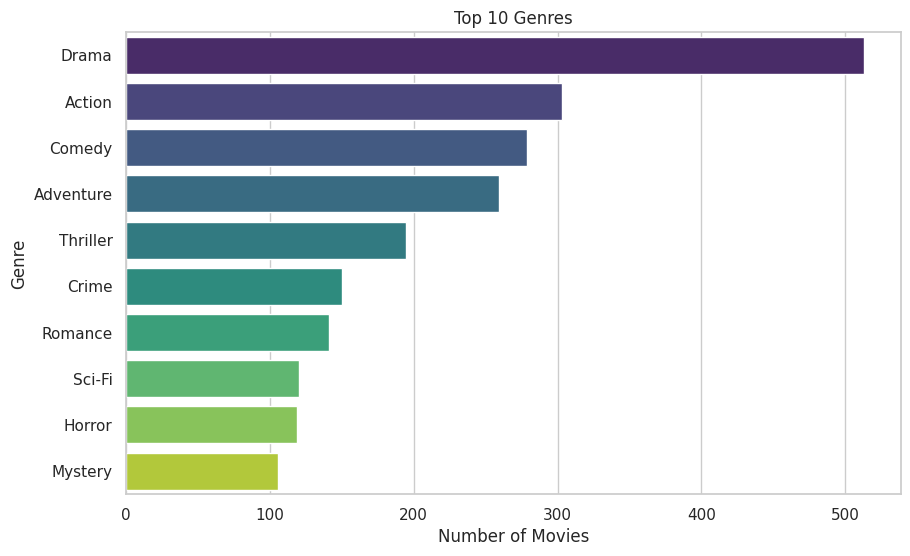

In [ ]:
genres = df['Genre'].str.split(',').explode().str.strip().value_counts().head(10)
sns.barplot(x=genres.values, y=genres.index, palette='viridis')
plt.title('Top 10 Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()


# **Top 10 Directors by Average Rating**

/tmp/ipython-input-83-3566480709.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dir_avg.values, y=dir_avg.index, palette='magma')


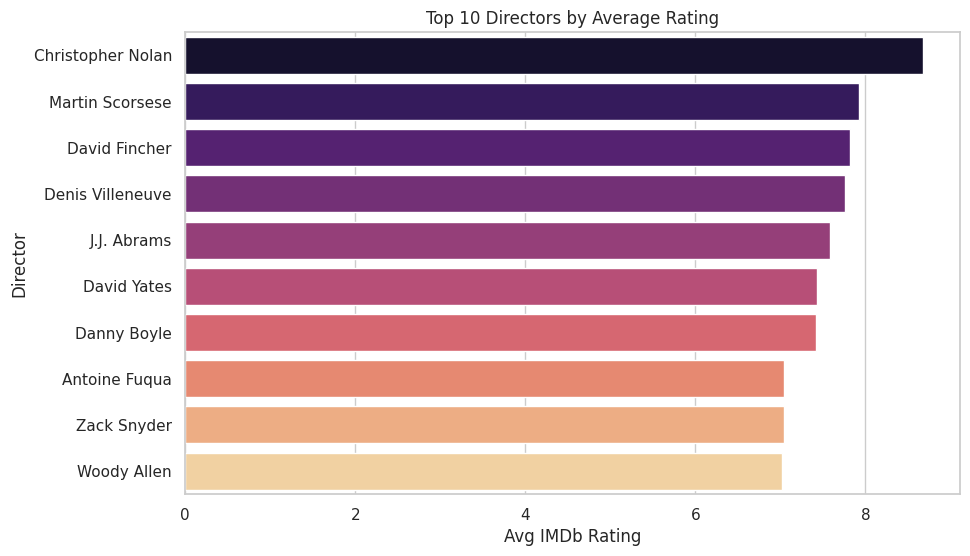

In [ ]:
top_dirs = df['Director'].value_counts()
dirs = top_dirs[top_dirs >= 5].index
dir_avg = df[df['Director'].isin(dirs)].groupby('Director')['Rating'].mean().sort_values(ascending=False).head(10)

sns.barplot(x=dir_avg.values, y=dir_avg.index, palette='magma')
plt.title('Top 10 Directors by Average Rating')
plt.xlabel('Avg IMDb Rating')
plt.ylabel('Director')
plt.show()


# **Rating Distribution Plot**

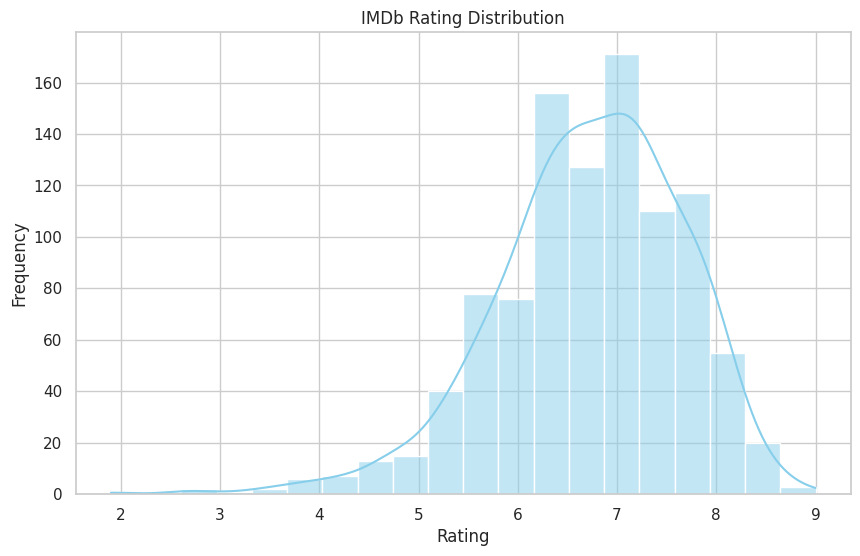

In [ ]:
sns.histplot(df['Rating'], bins=20, kde=True, color='skyblue')
plt.title('IMDb Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


# **Movie Count by Year (Line Plot)**

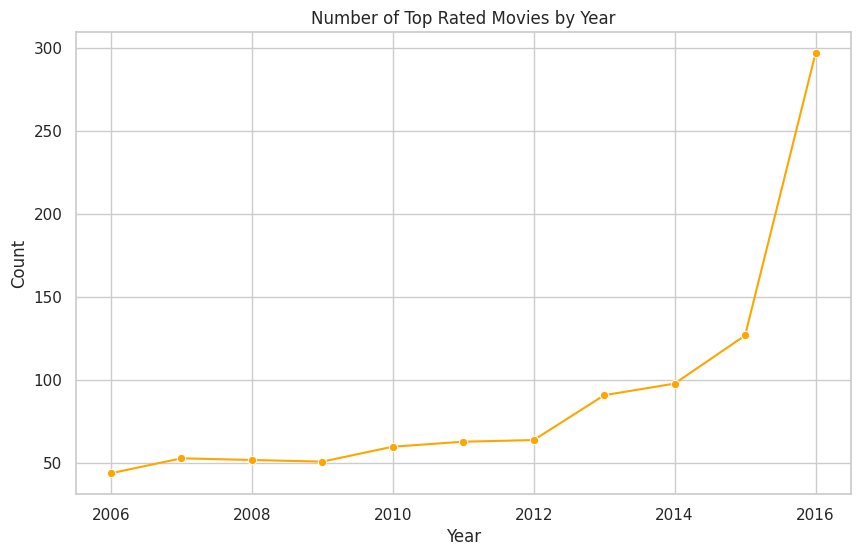

In [ ]:
year_count = df['Year'].value_counts().sort_index()
sns.lineplot(x=year_count.index, y=year_count.values, marker='o', color='orange')
plt.title('Number of Top Rated Movies by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


# **Top 10 Actors by Number of Movies**

/tmp/ipython-input-86-3560562345.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=actors.values, y=actors.index, palette='cubehelix')


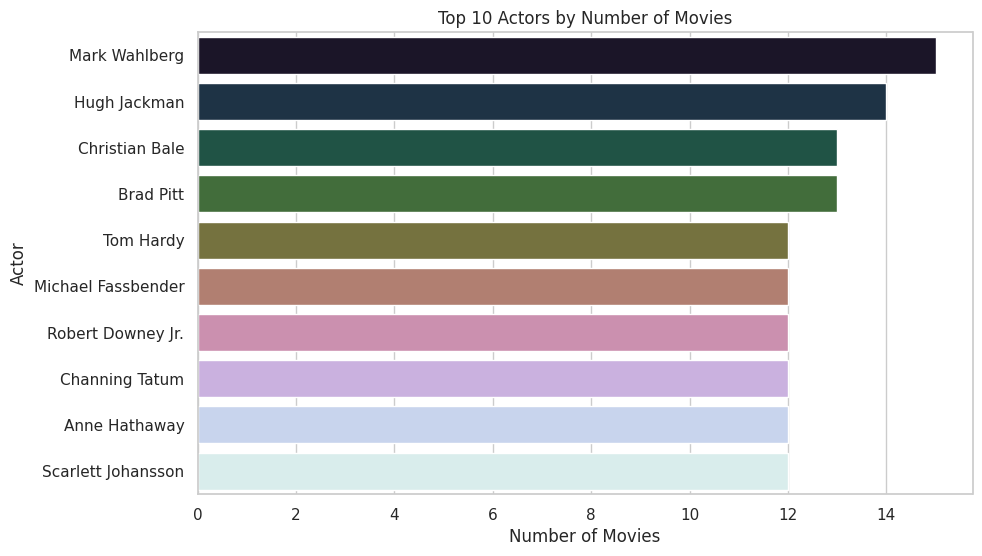

In [ ]:
actors = df['Actors'].str.split(',').explode().str.strip().value_counts().head(10)
sns.barplot(x=actors.values, y=actors.index, palette='cubehelix')
plt.title('Top 10 Actors by Number of Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.show()


# **Conclusions:-**

Drama, Action, and Comedy are the most common movie genres.

A few directors with 5+ movies have consistently high IMDb ratings.

IMDb ratings are mostly between 6.0 and 7.5.

Movie production increased steadily until a certain point, then leveled off.

Some actors appear frequently across multiple top-rated movies.

Revenue values vary widely, indicating skewed distribution (handled with median).

Metascore was best filled using mode due to its discrete nature.

USA dominates in content production, followed by UK and other countries.

Data cleaning (removing 0s, duplicates, and missing values) improved reliability.

The dataset provides good insights into movie trends, audience preferences, and industry patterns.